In [4]:
import numpy as np
import matplotlib.pyplot as plt
import concurrent
from functools import partial
import os
import torch

In [158]:
def render_drawing(drawing_data, class_name, ax=None, is_reversed=True):
    if not is_reversed:
        drawing_data = np.flip(drawing_data, axis=0)
        
    abs_data = np.cumsum(drawing_data, axis=0)
    if drawing_data.shape[1] == 3:
        start_mask = drawing_data[:, 2] == 1
        start_indices = np.arange(len(drawing_data))[start_mask]
        start_indices = np.append(start_indices, len(drawing_data))
    else:
        start_indices = [0, len(drawing_data)]
    
    if ax == None:
        plt.title('Sketch Drawing of ' + class_name)
        ax = plt
        
    for idx in range(1, len(start_indices)):
        start = start_indices[idx-1]
        end = start_indices[idx]
        ax.plot(abs_data[start:end, 0], abs_data[start:end, 1], c = 'blue')
        
def render_strokes(file_idx, class_name, split):
    class_path = os.path.join(os.getcwd(), "data_strokes")
    class_path = os.path.join(class_path, split)
    class_path = os.path.join(class_path, class_name)
    strokes = [os.path.join(class_path, stroke) for stroke \
                            in os.listdir(class_path) if str(file_idx) + '-' in stroke]
    n_strokes = len(strokes)
    width = 20.0
    height = width / float(n_strokes)
    fig, ax = plt.subplots(1, n_strokes, figsize=(width, height))
    for idx, stroke in enumerate(strokes):
        drawing = torch.load(stroke)
        render_drawing(drawing, class_name, ax[idx])
        
        
def plot_histograms(class_str="all"):
    title = "Distributions of lengths, # strokes, strokes/sketch for " + class_str + " sketches"
    all_path = os.path.join(os.getcwd(), "data_stats", "strokes", class_str)
    selected_plots = ['lengths', 'n_strokes', 'stroke_lengths']
    splits = ['train', 'valid', 'test']
    max_szs = [150, 63, 150]

    width = 20.
    height = 20.
    fig, ax = plt.subplots(3, 3, figsize=(height, width))
    fontsize = 30

    fig.suptitle(title, fontsize=fontsize, y=.93)
    for i in range(3):
        file = os.path.join(all_path, selected_plots[i] + '.pt')
        cur_tensor = torch.load(file)
        for j in range(3):
            if j == 0:
                ax[i][j].set_ylabel(selected_plots[i], fontsize=fontsize)
            if i == 2:
                ax[i][j].set_xlabel(splits[j], fontsize=fontsize)
            subsection = cur_tensor[:max_szs[i], j]
            split = splits[j]
            ax[i][j].bar(np.arange(len(subsection)), subsection)
            
            
def stats_printer(class_str="all"):
    print("Collecting Stats on the " + class_str + " class")
    all_path = os.path.join(os.getcwd(), "data_stats", "strokes", class_str)
    length_file = os.path.join(all_path, "lengths.pt")
    all_lengths = torch.load(length_file)
    truncate_file = os.path.join(all_path, "truncate.pt")
    truncated = torch.load(truncate_file)
    
    splits = ['Train', 'Valid', 'Test']
    for idx, length in enumerate(all_lengths.T):
        split = splits[idx]
        print("\n\n\nGathering Statistics for " + class_str + " Lengths in the " + split + " split")
        total_length = 0
        for l_idx, ele in enumerate(length):
            total_length += ele * (l_idx+1)
        mean = total_length / torch.sum(length)
        largest = 150
        smallest = 2

        running_sum = 0
        for l_idx, ele in enumerate(length):
            running_sum += (((l_idx + 1 - mean) * torch.sqrt(ele))**2)
        running_sum /= torch.sum(length)
        std = torch.sqrt(running_sum)

        proportion_truncated = truncated[idx] / torch.sum(length)

        print("mean = ", mean.item())
        print("std = ", std.item())
        print("max = ", largest)
        print("min = ", smallest)
        print("Proportion truncated = ", proportion_truncated.item())

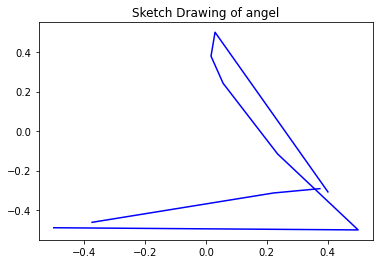

In [73]:
drawing = torch.load('data_full/test/angel/0.pt')
render_drawing(drawing, 'angel')

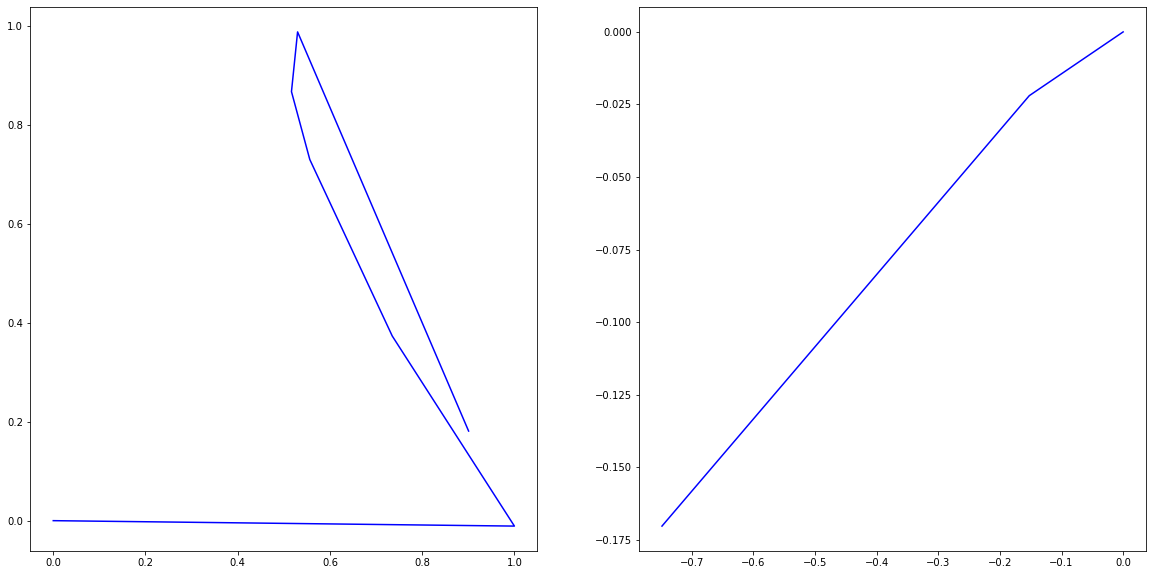

In [78]:
file_idx = 0
class_name = 'angel'
split = 'test'
render_strokes(file_idx, class_name, split)

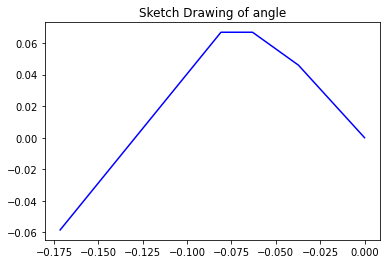

In [160]:
idx = 6
sub_idx = 5
a = torch.load('data_strokes/train/angel/' + str(idx) + '-' + str(sub_idx) + '.pt')
render_drawing(a, 'angle')

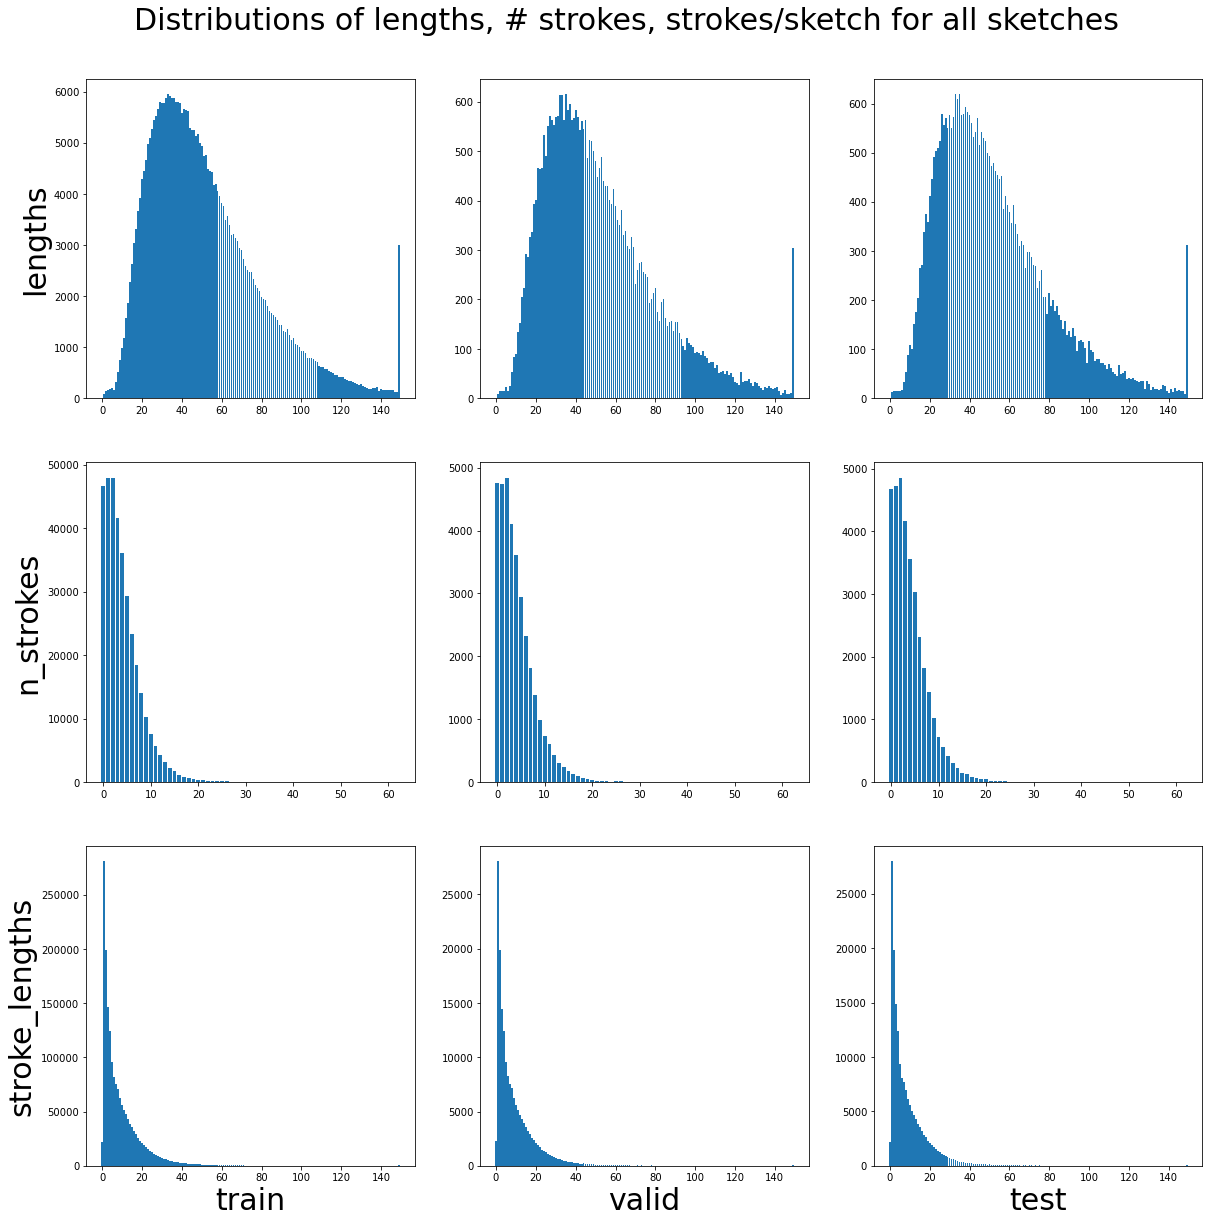

In [159]:
plot_histograms(class_str="all")

In [176]:
stats_printer("ant")




Gathering Statistics for ant Lengths in the Train split
mean =  54.14400100708008
std =  17.37916374206543
max =  150
min =  2
Proportion truncated =  0.0



Gathering Statistics for ant Lengths in the Valid split
mean =  53.97999954223633
std =  17.64255142211914
max =  150
min =  2
Proportion truncated =  0.0



Gathering Statistics for ant Lengths in the Test split
mean =  54.90999984741211
std =  17.672632217407227
max =  150
min =  2
Proportion truncated =  0.0





Gathering Statistics for Lengths in the Train split
mean =  52.6436653137207
std =  27.964296340942383
max =  150
min =  2
Proportion truncated =  0.008344927802681923



Gathering Statistics for Lengths in the Valid split
mean =  52.74223327636719
std =  28.0401668548584
max =  150
min =  2
Proportion truncated =  0.008405797183513641



Gathering Statistics for Lengths in the Test split
mean =  52.679073333740234
std =  27.989931106567383
max =  150
min =  2
Proportion truncated =  0.008782608434557915
